#### Exam description
For this exam, you will predict the target values for the test.csv. 

#### Your task:
find a good machine learning model to predict the target value. Then predict the target values of the instances in the test.csv. 

#### Exam rules
- You can use only the machine learning models discussed in this course. 
    - If the prediction is based on a model that is not discussed in class, one of the models in your submission will randomly be selected for grading. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 
- Save the final prediction array as ``final_test_prediction``. 
- <font color = 'red'> The final prediction will be evaluated using the **roc_auc_score** function. </font>

#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|Machine learning model | Demonstrate limited understanding of methods used to train machine learning models | Demonstrate the ability to understand techniques used to train machine learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.


# Preprocessing ``train.csv`` (15 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Explore the Data

In [3]:
df_train.head()

,$1000 Damage to Any One Person's Property,Bridge Detail,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Time,Day of Week,Highway System,Intersecting Highway Number,Intersecting Street Name,Manner of Collision,Median Type,Median Width,Number of Entering Roads,Number of Lanes,Surface Condition,Surface Type,Surface Width,Weather Condition,Crash Severity
0,Yes,NOT APPLICABLE,No,No,638,TUESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
1,Yes,NOT APPLICABLE,No,No,1658,SUNDAY,STATE SPUR,No Data,N FIELD ST,ANGLE - BOTH GOING STRAIGHT,No Data,40,97 - NOT APPLICABLE,8,2 - WET,No Data,96,3 - RAIN,Not serious
2,Yes,NOT APPLICABLE,No,No,1715,WEDNESDAY,STATE SPUR,No Data,AKARD ST,SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN,No Data,No Data,97 - NOT APPLICABLE,No Data,1 - DRY,No Data,No Data,2 - CLOUDY,Not serious
3,Yes,NOT APPLICABLE,No,No,1817,FRIDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
4,Yes,NOT APPLICABLE,No,No,1950,SUNDAY,STATE SPUR,345,IH0345,ANGLE - BOTH GOING STRAIGHT,No Data,40,4 - FOUR ENTERING ROADS,8,1 - DRY,No Data,96,1 - CLEAR,Not serious


In [4]:
print('Train:',df_train.shape,'Test:',df_test.shape)

Train: (2322, 19) Test: (774, 18)


### Lets check the Target column

In [5]:
df_train['Crash Severity'].value_counts()

Not serious    2286
Serious          36
Name: Crash Severity, dtype: int64

<AxesSubplot:title={'center':'Crash Severity'}>

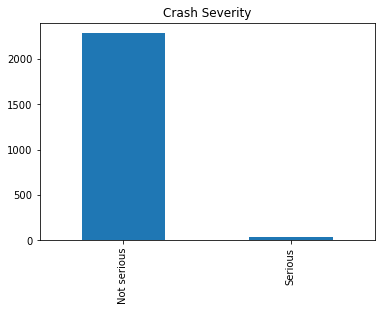

In [6]:
df_train["Crash Severity"].value_counts().plot(kind='bar', 
                                         title="Crash Severity")

#### The data is Imblanaced

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2322 non-null   object
 1   Bridge Detail                              2322 non-null   object
 2   Construction Zone Flag                     2322 non-null   object
 3   Construction Zone Workers Present Flag     2322 non-null   object
 4   Crash Time                                 2322 non-null   int64 
 5   Day of Week                                2322 non-null   object
 6   Highway System                             2322 non-null   object
 7   Intersecting Highway Number                2322 non-null   object
 8   Intersecting Street Name                   541 non-null    object
 9   Manner of Collision                        2322 non-null   object
 10  Median Type                         

#### Let us plot all the Columns

<AxesSubplot:title={'center':'Day of Week'}>

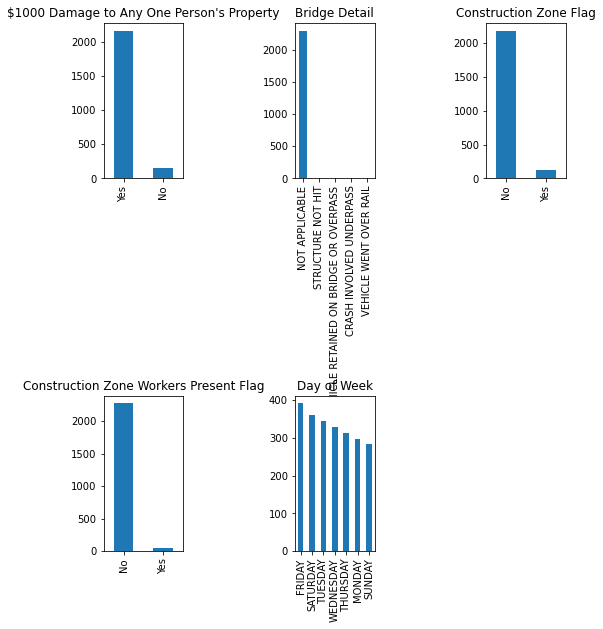

In [8]:
# Set up a grid of plots
fig = plt.figure(figsize=(10,20)) 
fig_dims = (6,6)

# Plot $1000 Damage to Any One Person's Property
plt.subplot2grid(fig_dims, (1, 0))
df_train["$1000 Damage to Any One Person's Property"].value_counts().plot(kind='bar', 
                                         title="$1000 Damage to Any One Person's Property")

# Bridge Detail
plt.subplot2grid(fig_dims, (1, 2))
df_train["Bridge Detail"].value_counts().plot(kind='bar', title="Bridge Detail")

# Construction Zone Flag
plt.subplot2grid(fig_dims, (1, 4))
df_train["Construction Zone Flag"].value_counts().plot(kind='bar', 
                                         title="Construction Zone Flag")
# Construction Zone Workers Present Flag
plt.subplot2grid(fig_dims, (3, 0))
df_train["Construction Zone Workers Present Flag"].value_counts().plot(kind='bar', 
                                         title="Construction Zone Workers Present Flag")
# Day of Week                                           
plt.subplot2grid(fig_dims, (3, 2))
df_train["Day of Week"].value_counts().plot(kind='bar', 
                                         title="Day of Week") 
                                            


In [9]:
df_train['Bridge Detail'].value_counts()

NOT APPLICABLE                            2296
STRUCTURE NOT HIT                           11
VEHICLE RETAINED ON BRIDGE OR OVERPASS       8
CRASH INVOLVED UNDERPASS                     6
VEHICLE WENT OVER RAIL                       1
Name: Bridge Detail, dtype: int64

<AxesSubplot:title={'center':'Intersecting Street Name'}>

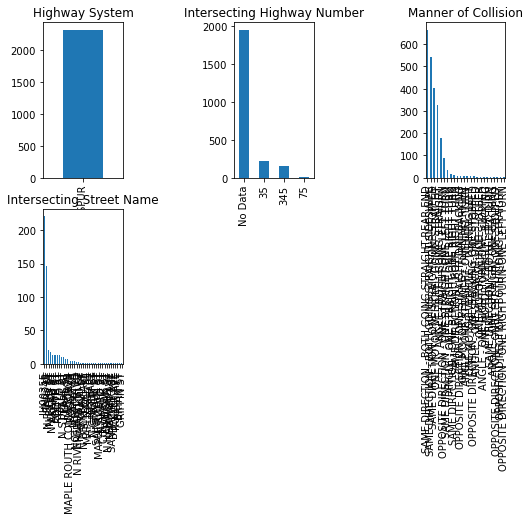

In [10]:
fig = plt.figure(figsize=(10,20)) 
fig_dims = (6,6 )

#                                             
plt.subplot2grid(fig_dims, (2, 0))
df_train["Highway System"].value_counts().plot(kind='bar', 
                                         title="Highway System") 

#
plt.subplot2grid(fig_dims, (2, 2))
df_train["Intersecting Highway Number"].value_counts().plot(kind='bar', 
                                         title="Intersecting Highway Number")
#
plt.subplot2grid(fig_dims, (2, 4))
df_train["Manner of Collision"].value_counts().plot(kind='bar', 
                                         title="Manner of Collision")
#
plt.subplot2grid(fig_dims, (3, 0))
df_train["Intersecting Street Name"].value_counts().plot(kind='bar', 
                                         title="Intersecting Street Name")


#### Too many Catogories in Manner of Collision and Intersecting Street Name , lets check the value counts for the Manner of Collision and Intersecting Street Name column

In [11]:
df_train["Manner of Collision"].value_counts()

SAME DIRECTION - BOTH GOING STRAIGHT-REAR END        665
SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE       542
SAME DIRECTION - ONE STRAIGHT-ONE STOPPED            404
ONE MOTOR VEHICLE - GOING STRAIGHT                   325
ANGLE - BOTH GOING STRAIGHT                          177
OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN       89
SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN           32
ANGLE - ONE STRAIGHT-ONE RIGHT TURN                   16
SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN          12
SAME DIRECTION - BOTH RIGHT TURN                       9
OPPOSITE DIRECTION - ONE STRAIGHT-ONE BACKING          9
ONE MOTOR VEHICLE - TURNING RIGHT                      9
ANGLE - ONE STRAIGHT-ONE LEFT TURN                     8
ONE MOTOR VEHICLE - TURNING LEFT                       7
OPPOSITE DIRECTION - ONE BACKING-ONE STOPPED           7
ANGLE - ONE STRAIGHT-ONE STOPPED                       2
ONE MOTOR VEHICLE - OTHER                              2
ANGLE - ONE RIGHT TURN-ONE STOP

In [12]:
df_train["Intersecting Street Name"].value_counts()

IH0035E                   221
IH0345                    146
N PEARL ST                 21
N FIELD ST                 18
N AKARD ST                 14
AKARD ST                   14
OLIVE ST                   14
ROUTH ST                   13
FIELD ST                   11
N ST PAUL ST               11
PEARL ST                    8
US0075                      7
MAPLE ROUTH CONNECTION      5
ROSS AVE                    4
N OLIVE ST                  4
NOT REPORTED                3
N RIVERFRONT BLVD           3
HARWOOD ST                  2
ST PAUL ST                  2
N BECKLEY AVE               2
BOLL ST                     2
MAPLE ROUTH                 1
N PEARL                     1
N GRIFFIN ST                1
STPAUL ST                   1
SAINT PAUL ST               1
MAPLE ROUTH ST              1
N AKARO ST                  1
COLUMBUS ST                 1
LIVE OAK ST                 1
N HARWOOD ST                1
LEMMON AVE                  1
SAN JACINTO ST              1
BECKLEY AV

<AxesSubplot:title={'center':'Number of Entering Roads'}>

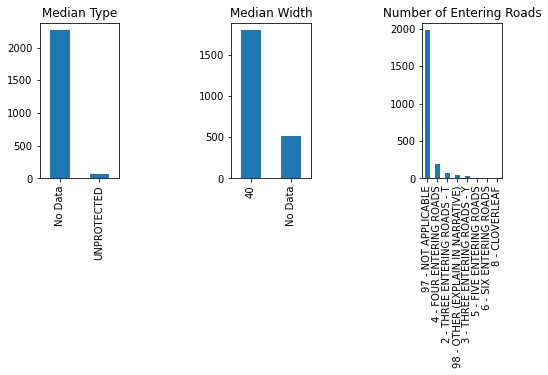

In [13]:
fig = plt.figure(figsize=(10,20)) 
fig_dims = (6,6)
#Median Type
plt.subplot2grid(fig_dims, (3,0))
df_train["Median Type"].value_counts().plot(kind='bar', 
                                         title="Median Type")
#Number of Entering Roads
plt.subplot2grid(fig_dims, (3,2))
df_train["Median Width"].value_counts().plot(kind='bar', 
                                         title="Median Width")

#
#
plt.subplot2grid(fig_dims, (3,4))
df_train["Number of Entering Roads"].value_counts().plot(kind='bar', 
                                         title="Number of Entering Roads")

<AxesSubplot:title={'center':'Weather Condition'}>

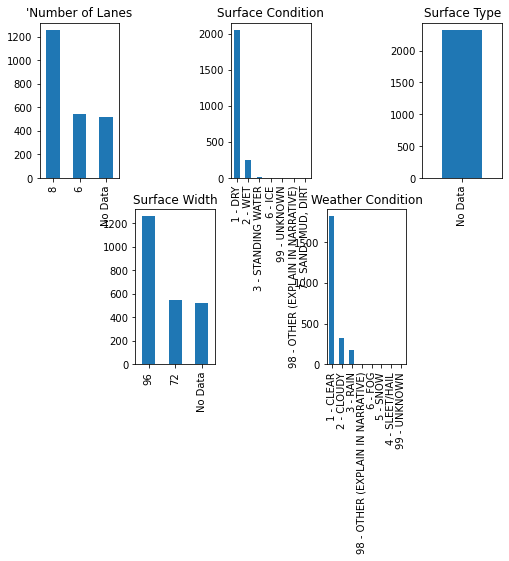

In [14]:
fig = plt.figure(figsize=(10,20)) 
fig_dims = (6,6 )
#
plt.subplot2grid(fig_dims, (3,0))
df_train["Number of Lanes"].value_counts().plot(kind='bar', 
                                         title="'Number of Lanes")

#
plt.subplot2grid(fig_dims, (3,2))
df_train["Surface Condition"].value_counts().plot(kind='bar', 
                                         title="Surface Condition")
#
plt.subplot2grid(fig_dims, (3,4))
df_train["Surface Type"].value_counts().plot(kind='bar', 
                                         title="Surface Type")

#
plt.subplot2grid(fig_dims, (4,1))
df_train["Surface Width"].value_counts().plot(kind='bar', 
                                         title="Surface Width")

#
plt.subplot2grid(fig_dims, (4,3))
df_train["Weather Condition"].value_counts().plot(kind='bar', 
                                         title="Weather Condition")

Text(0.5, 1.0, 'Crash Time')

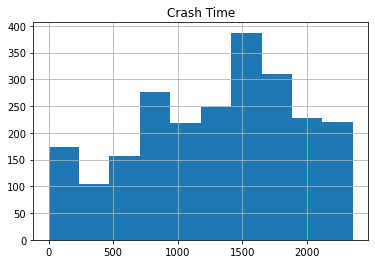

In [15]:
# Plot the Crash time histogram
df_train['Crash Time'].hist()
plt.title('Crash Time')

#### $1000 Damage to Any One Person's Property map Yes : 1 No : 0
#### Bridge Detail: Mege and Map
#### Construction Zone Workers Present Flag : Map No : 1 , YES : 0
#### Construction Zone Flag: Map No : 1 , YES : 0
#### Crash Time : Same
#### Day of the week : Make Dummies 
#### DROP High System : 1 value - Drop Column
#### Intersecting Highway Number : Drop Column
#### Manner of Collision : 4 catogories
#### Median Type : Drop. only one value in the column
#### Median Width : Drop. only one value in the column
#### Number of Entering Roads : Remove Text keep no. convert to numeric, Assumed Heirarchy.
#### Number of Lanes : impute Mode.
#### Surface Condition : Merge and get dummies
#### Surface Type : Drop
#### Surface Width : impute Mode
#### Weather Condition : Creat dummies
#### Crash Severity : Map Serious : 1 , Not Serious : 0

In [16]:
df_train['Crash Severity'].value_counts()

Not serious    2286
Serious          36
Name: Crash Severity, dtype: int64

In [17]:
df_train = pd.read_csv('train.csv')

In [18]:
df_train.shape

(2322, 19)

In [19]:
df_train['Bridge Detail'].value_counts()

NOT APPLICABLE                            2296
STRUCTURE NOT HIT                           11
VEHICLE RETAINED ON BRIDGE OR OVERPASS       8
CRASH INVOLVED UNDERPASS                     6
VEHICLE WENT OVER RAIL                       1
Name: Bridge Detail, dtype: int64

In [20]:
#$1000 Damage to Any One Person's Property
df_train["$1000 Damage to Any One Person's Property"]= df_train["$1000 Damage to Any One Person's Property"].map({'Yes':1,'No':0}).astype(int)

# Bridge Detail :

df_train.replace({'Bridge Detail': {'VEHICLE WENT OVER RAIL': 'APPLICABLE','VEHICLE RETAINED ON BRIDGE OR OVERPASS':'APPLICABLE',
'STRUCTURE NOT HIT' : 'APPLICABLE',                                  
'CRASH INVOLVED UNDERPASS': 'APPLICABLE',}}, inplace=True)

df_train["Bridge Detail"]= df_train["Bridge Detail"].map({'NOT APPLICABLE':1,'APPLICABLE':0}).astype(int)
                                     

# Construction Zone Workers Present Flag
df_train['Construction Zone Flag'] = df_train['Construction Zone Flag'].map({'No':1,'Yes':0}).astype(int)

# Construction Zone Flag
df_train['Construction Zone Workers Present Flag'] = df_train['Construction Zone Workers Present Flag'].map({'No':1,'Yes':0}).astype(int)

# Crash Time


# Day of the week
cols = pd.get_dummies(df_train['Day of Week'],prefix = 'Day of the week')
df_train[cols.columns] = cols

# Crash Time : before Noon AFTER nOON : Map

df_train['Crash Time'] = pd.to_numeric(df_train['Crash Time'],errors='coerce')

# Manner of Collision

df_train['Manner of Collision']=df_train['Manner of Collision'].str.replace('OPPOSITE DIRECTION - ONE STRAIGHT-ONE BACKING',"OTHER")
df_train['Manner of Collision']=df_train['Manner of Collision'].str.replace('ANGLE - ONE STRAIGHT-ONE STOPPED',"OTHER")
df_train['Manner of Collision']=df_train['Manner of Collision'].str.replace('ANGLE - ONE RIGHT TURN-ONE STOPPED',"OTHER")
df_train['Manner of Collision']=df_train['Manner of Collision'].str.replace('OPPOSITE DIRECTION - ONE LEFT TURN-ONE STOPPED',"OTHER")

cols = pd.get_dummies(df_train['Manner of Collision'],prefix = 'Manner of Collision')
df_train[cols.columns] = cols



# Number of Entering Roads
df_train['Number of Entering Roads']=df_train['Number of Entering Roads'].str.replace('5 - FIVE ENTERING ROADS',"98 - OTHER (EXPLAIN IN NARRATIVE)")
df_train['Number of Entering Roads']=df_train['Number of Entering Roads'].str.replace('6 - SIX ENTERING ROADS',"98 - OTHER (EXPLAIN IN NARRATIVE)")
df_train['Number of Entering Roads']=df_train['Number of Entering Roads'].str.replace('8 - CLOVERLEAF',"98 - OTHER (EXPLAIN IN NARRATIVE)")

cols = pd.get_dummies(df_train['Number of Entering Roads'],prefix = 'Number of Entering Roads')
df_train[cols.columns] = cols

# Number of Lanes
df_train['Number of Lanes'] = np.where(df_train['Number of Lanes']=='No Data',df_train['Number of Lanes'].value_counts().idxmax(),df_train['Number of Lanes']).astype(int)
#cols = pd.get_dummies(df_train['Number of Lanes'],prefix = 'Number of Lanes')
#df_train[cols.columns] = cols

# Surface Condition
df_train['Surface Condition']=df_train['Surface Condition'].str.replace('99 - UNKNOWN',"98 - OTHER (EXPLAIN IN NARRATIVE)")
df_train['Surface Condition']=df_train['Surface Condition'].str.replace('7 - SAND, MUD, DIRT',"98 - OTHER (EXPLAIN IN NARRATIVE)")


cols = pd.get_dummies(df_train['Surface Condition'],prefix = 'Surface Condition')
df_train[cols.columns] = cols


# Surface Width
df_train['Surface Width'] = np.where(df_train['Surface Width']=='No Data',df_train['Surface Width'].value_counts().idxmax(),df_train['Surface Width']).astype(int)
#cols = pd.get_dummies(df_train['Surface Width'],prefix = 'Surface Width')
#df_train[cols.columns] = cols

# Weather Condition
df_train['Weather Condition']=df_train['Weather Condition'].str.replace('99 - UNKNOWN',"98 - OTHER (EXPLAIN IN NARRATIVE)")
df_train['Weather Condition']=df_train['Weather Condition'].str.replace('4 - SLEET/HAIL',"98 - OTHER (EXPLAIN IN NARRATIVE)")
df_train['Weather Condition']=df_train['Weather Condition'].str.replace('5 - SNOW',"98 - OTHER (EXPLAIN IN NARRATIVE)")

cols = pd.get_dummies(df_train['Weather Condition'],prefix = 'Weather Condition')
df_train[cols.columns] = cols

# Crash Severity

df_train["Crash Severity"]= df_train["Crash Severity"].map({'Serious':1,'Not serious':0}).astype(int)


# Drop columns Bridge Detail,Intersecting Highway Number,Intersecting Street Name,Surface Type,Median Type,Median Width

df_train.drop(['Weather Condition','Surface Condition','Intersecting Highway Number',
               'Intersecting Street Name','Surface Type','Number of Entering Roads','Manner of Collision','Day of Week',
                          'Median Type','Median Width','Highway System'],axis=1,inplace=True)


In [21]:
len(df_train.columns)

51

In [22]:
df_train.columns

Index(['$1000 Damage to Any One Person's Property', 'Bridge Detail',
       'Construction Zone Flag', 'Construction Zone Workers Present Flag',
       'Crash Time', 'Number of Lanes', 'Surface Width', 'Crash Severity',
       'Day of the week_FRIDAY', 'Day of the week_MONDAY',
       'Day of the week_SATURDAY', 'Day of the week_SUNDAY',
       'Day of the week_THURSDAY', 'Day of the week_TUESDAY',
       'Day of the week_WEDNESDAY',
       'Manner of Collision_ANGLE - BOTH GOING STRAIGHT',
       'Manner of Collision_ANGLE - ONE STRAIGHT-ONE BACKING',
       'Manner of Collision_ANGLE - ONE STRAIGHT-ONE LEFT TURN',
       'Manner of Collision_ANGLE - ONE STRAIGHT-ONE RIGHT TURN',
       'Manner of Collision_ONE MOTOR VEHICLE - BACKING',
       'Manner of Collision_ONE MOTOR VEHICLE - GOING STRAIGHT',
       'Manner of Collision_ONE MOTOR VEHICLE - OTHER',
       'Manner of Collision_ONE MOTOR VEHICLE - TURNING LEFT',
       'Manner of Collision_ONE MOTOR VEHICLE - TURNING RIGHT',
     

In [23]:
df_train.columns

Index(['$1000 Damage to Any One Person's Property', 'Bridge Detail',
       'Construction Zone Flag', 'Construction Zone Workers Present Flag',
       'Crash Time', 'Number of Lanes', 'Surface Width', 'Crash Severity',
       'Day of the week_FRIDAY', 'Day of the week_MONDAY',
       'Day of the week_SATURDAY', 'Day of the week_SUNDAY',
       'Day of the week_THURSDAY', 'Day of the week_TUESDAY',
       'Day of the week_WEDNESDAY',
       'Manner of Collision_ANGLE - BOTH GOING STRAIGHT',
       'Manner of Collision_ANGLE - ONE STRAIGHT-ONE BACKING',
       'Manner of Collision_ANGLE - ONE STRAIGHT-ONE LEFT TURN',
       'Manner of Collision_ANGLE - ONE STRAIGHT-ONE RIGHT TURN',
       'Manner of Collision_ONE MOTOR VEHICLE - BACKING',
       'Manner of Collision_ONE MOTOR VEHICLE - GOING STRAIGHT',
       'Manner of Collision_ONE MOTOR VEHICLE - OTHER',
       'Manner of Collision_ONE MOTOR VEHICLE - TURNING LEFT',
       'Manner of Collision_ONE MOTOR VEHICLE - TURNING RIGHT',
     

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 51 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   $1000 Damage to Any One Person's Property                              2322 non-null   int32
 1   Bridge Detail                                                          2322 non-null   int32
 2   Construction Zone Flag                                                 2322 non-null   int32
 3   Construction Zone Workers Present Flag                                 2322 non-null   int32
 4   Crash Time                                                             2322 non-null   int64
 5   Number of Lanes                                                        2322 non-null   int32
 6   Surface Width                                                          2322 non-null   int32
 7   Crash 

# Preprocessing ``test.csv`` (10 points)

#### Applying the same Pre - processing to the test dataset

In [25]:
df_test = pd.read_csv('test.csv')

In [26]:
df_test['Bridge Detail'].value_counts()

NOT APPLICABLE                            772
STRUCTURE NOT HIT                           1
VEHICLE RETAINED ON BRIDGE OR OVERPASS      1
Name: Bridge Detail, dtype: int64

In [27]:
#$1000 Damage to Any One Person's Property
df_test["$1000 Damage to Any One Person's Property"]= df_test["$1000 Damage to Any One Person's Property"].map({'Yes':1,'No':0}).astype(int)

# Bridge Detail : 

df_test.replace({'Bridge Detail': {'VEHICLE WENT OVER RAIL': 'APPLICABLE','VEHICLE RETAINED ON BRIDGE OR OVERPASS':'APPLICABLE',
'STRUCTURE NOT HIT' : 'APPLICABLE',                                  
'CRASH INVOLVED UNDERPASS': 'APPLICABLE',}}, inplace=True)

df_test["Bridge Detail"]= df_test["Bridge Detail"].map({'NOT APPLICABLE':1,'APPLICABLE':0}).astype(int)

# Construction Zone Workers Present Flag
df_test['Construction Zone Flag'] = df_test['Construction Zone Flag'].map({'No':1,'Yes':0}).astype(int)

# Construction Zone Flag
df_test['Construction Zone Workers Present Flag'] = df_test['Construction Zone Workers Present Flag'].map({'No':1,'Yes':0}).astype(int)

# Crash Time


# Day of the week
cols = pd.get_dummies(df_test['Day of Week'],prefix = 'Day of the week')
df_test[cols.columns] = cols

# Crash Time : before Noon AFTER nOON : Map

df_test['Crash Time'] = pd.to_numeric(df_test['Crash Time'],errors='coerce')

# Manner of Collision
df_test['Manner of Collision']=df_test['Manner of Collision'].str.replace('ANGLE - ONE LEFT TURN-ONE STOPPED',"OTHER")
cols = pd.get_dummies(df_test['Manner of Collision'],prefix = 'Manner of Collision')
df_test[cols.columns] = cols



# Number of Entering Roads
df_test.replace({'Number of Entering Roads': {'6 - SIX ENTERING ROADS': '98 - OTHER (EXPLAIN IN NARRATIVE)',
'7 - TRAFFIC CIRCLE': '98 - OTHER (EXPLAIN IN NARRATIVE)',
'8 - CLOVERLEAF': '98 - OTHER (EXPLAIN IN NARRATIVE)'}}, inplace=True)

cols = pd.get_dummies(df_test['Number of Entering Roads'],prefix = 'Number of Entering Roads')
df_test[cols.columns] = cols

# Number of Lanes
df_test['Number of Lanes'] = np.where(df_test['Number of Lanes']=='No Data',df_test['Number of Lanes'].value_counts().idxmax(),df_test['Number of Lanes']).astype(int)
#cols = pd.get_dummies(df_test['Number of Lanes'],prefix = 'Number of Lanes')
#df_test[cols.columns] = cols

# Surface Condition
df_test['Manner of Collision']=df_test['Manner of Collision'].str.replace('ANGLE - ONE LEFT TURN-ONE STOPPED',"OTHER")
cols = pd.get_dummies(df_test['Surface Condition'],prefix = 'Surface Condition')
df_test[cols.columns] = cols


# Surface Width
df_test['Surface Width'] = np.where(df_test['Surface Width']=='No Data',df_test['Surface Width'].value_counts().idxmax(),df_test['Surface Width']).astype(int)
#cols = pd.get_dummies(df_test['Surface Width'],prefix = 'Surface Width')
#df_test[cols.columns] = cols

# Weather Condition
cols = pd.get_dummies(df_test['Weather Condition'],prefix = 'Weather Condition')
df_test[cols.columns] = cols

# Drop columns Bridge Detail,Intersecting Highway Number,Intersecting Street Name,Surface Type,Median Type,Median Width

df_test.drop(['Weather Condition','Surface Condition','Intersecting Highway Number',
               'Intersecting Street Name','Surface Type','Number of Entering Roads','Manner of Collision','Day of Week',
                          'Median Type','Median Width','Highway System'],axis=1,inplace=True)


In [28]:
len(df_test.columns)

50

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 50 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   $1000 Damage to Any One Person's Property                              774 non-null    int32
 1   Bridge Detail                                                          774 non-null    int32
 2   Construction Zone Flag                                                 774 non-null    int32
 3   Construction Zone Workers Present Flag                                 774 non-null    int32
 4   Crash Time                                                             774 non-null    int64
 5   Number of Lanes                                                        774 non-null    int32
 6   Surface Width                                                          774 non-null    int32
 7   Day of t

# Machine learning models (20 points)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [31]:
x = df_train.drop(['Crash Severity'],axis=1)
y = df_train['Crash Severity']



print('Feature Set: ', x.shape)
print('Target Variable: ', y.shape)



# Splitting the dataset
x_train_og, x_test_og, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

# Transforming to Min Max Scaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train_og)
x_test = scaler.transform(x_test_og)


Feature Set:  (2322, 50)
Target Variable:  (2322,)


In [32]:
x_train.shape

(1857, 50)

#### Imbalanced Dataset We will apply models and post process them

In [33]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    train_score_array.append(knn.score(x_train, y_train))
    test_score_array.append(knn.score(x_test, y_test))

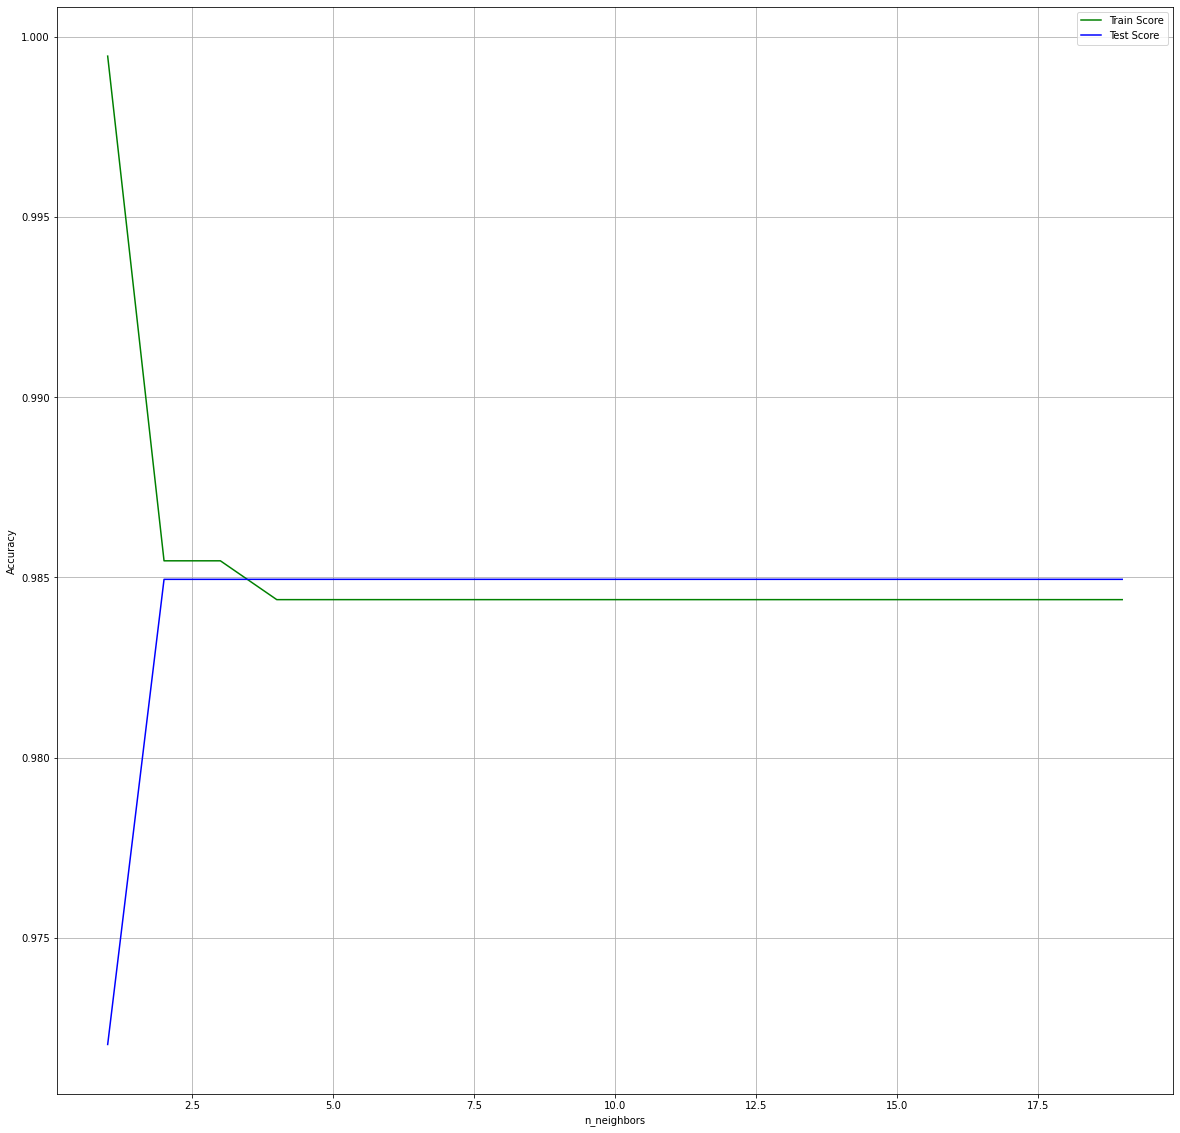

In [34]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,20))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
#plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

#### Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV
paramgridknn = {'n_neighbors':range(1,20), 
                  'p': [1,2],
                'weights': ['distance','uniform'],
                'metric': ['euclidean','manhattan'],
                   }

gsknn = GridSearchCV(KNeighborsClassifier(), paramgridknn , cv = 5,scoring='roc_auc')
gs_model = gsknn.fit(x_train, y_train)
print('GrideSearch knn score :',gs_model.best_score_)
print('GrideSearch knn parameters :',gs_model.best_params_)

GrideSearch knn score : 0.690974000049904
GrideSearch knn parameters : {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}


In [36]:

y_pred_knncs = gs_model.predict(x_test)

print('Knn train score: {:.4f} '.format(gs_model.score(x_train, y_train)))
print('Knn test score: {:.4f} '.format(gs_model.score(x_test, y_test)))

Knn train score: 1.0000 
Knn test score: 0.6163 


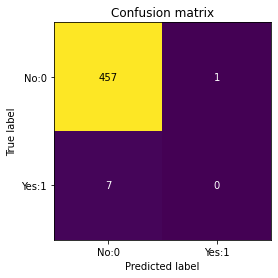

In [37]:
import mglearn
%matplotlib inline

scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [38]:
y_test.value_counts()

0    458
1      7
Name: Crash Severity, dtype: int64

In [39]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('KNN Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('KNN Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('KNN F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

KNN Recall score : 0.0000 
KNN Precision score : 0.0000 
KNN F1 score : 0.0000 


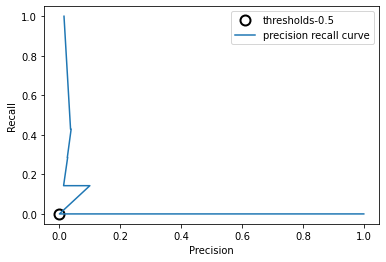

In [40]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.predict_proba(x_test)[:,1])

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [41]:
i = np.argmin(np.abs(recall - 0.19))

In [42]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the post processing: 
Precision:  0.9354838709677419
Recall:  0.14285714285714285


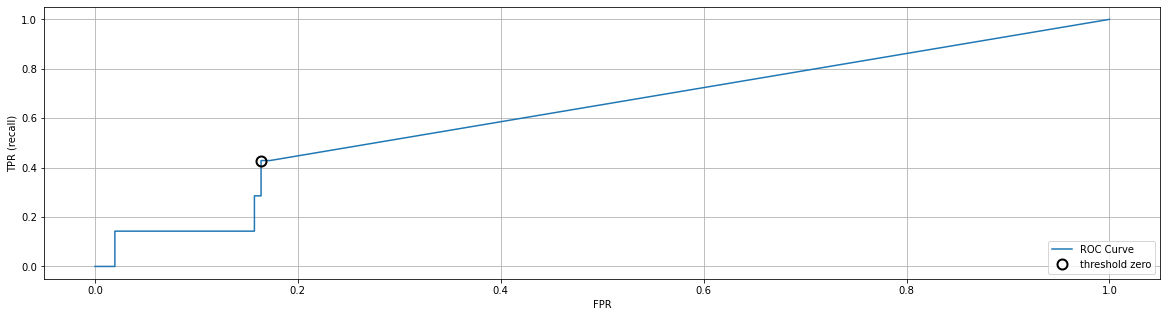

In [43]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.predict_proba(x_test)[:,1])

np.argmin(np.abs(tpr - 0.42))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[7], tpr[7], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [44]:
i = np.argmin(np.abs(tpr - 0.4))

In [45]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train[:,1])
post_recall =  recall_score(y_test,y_predict_test[:,1])
post_f1_score =  f1_score(y_test,y_predict_test[:,1])
print('Precision: ', precision_score(y_test, y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))                               

After the post processing: 
Precision:  0.038461538461538464
Recall:  0.42857142857142855
F1-score:  0.07058823529411765


In [46]:
CompTable = [['KNN Classification', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test[:,1]),
              post_f1_score]]
print('Summary of Knn:',CompTable)

Summary of Knn: [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765]]


### Logistic Regression

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
param_grid_log = { 'max_iter' : range(1,200), 
                  'penalty' : ['l1','l2'],
                'C' :np.linspace(0.01,1,20)}

gslog = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid_log, cv = 5, verbose = 1, n_jobs = -1,scoring='roc_auc')
gs_model = gslog.fit(x_train, y_train)

print('Best logistic grid search score',gs_model.best_score_)
print('Best logistic grid search Parameter',gslog.best_params_)

Fitting 5 folds for each of 7960 candidates, totalling 39800 fits
Best logistic grid search score 0.7113324350625048
Best logistic grid search Parameter {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}


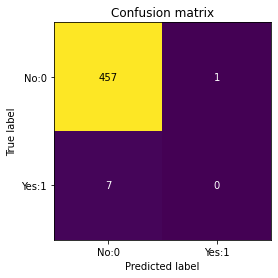

In [49]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [50]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


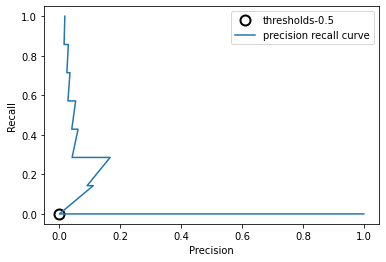

In [51]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.predict_proba(x_test)[:,1])

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [52]:
i = np.argmin(np.abs(recall - 0.35))

In [53]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the post processing: 
Precision:  0.06550218340611354
Recall:  0.2857142857142857


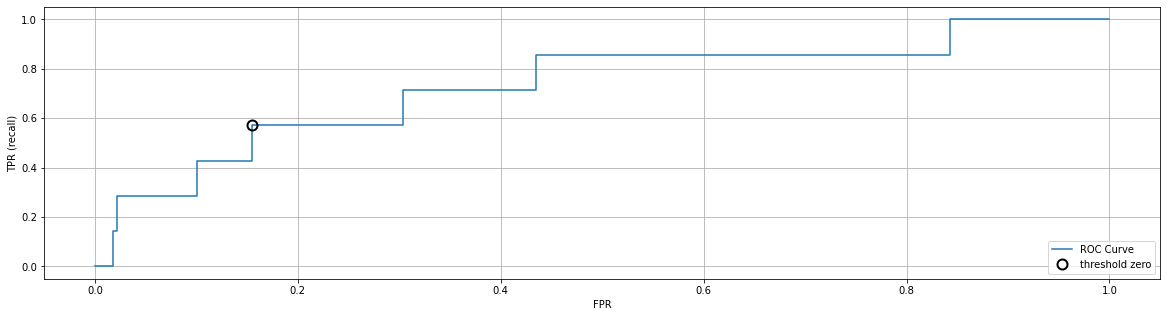

In [54]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.predict_proba(x_test)[:,1])

i = np.argmin(np.abs(tpr - 0.6))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [55]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train[:,1])
post_recall =  recall_score(y_test,y_predict_test[:,1])
post_f1_score =  f1_score(y_test,y_predict_test[:,1])
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))                               

After the post processing: 
Precision:  0.05572755417956656
Recall:  0.5714285714285714
F1-score:  0.0975609756097561


In [56]:
CompTable = CompTable +[['Log Classification', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test[:,1]),
              post_f1_score]]
print('Summary',CompTable)

Summary [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765], ['Log Classification', {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}, 0.8140232400211272, 0.732064878353088, 0.5714285714285714, 0.05572755417956656, 0.708203368683718, 0.0975609756097561]]


### Linear SVM

In [57]:
from sklearn.svm import LinearSVC,SVC
paramgridsvm = { 'max_iter' : range(1,150),
                'C' : [1,10,100,1000,10000]}

gs_model = GridSearchCV(estimator =LinearSVC(), param_grid = paramgridsvm ,cv = 5, n_jobs = -1,scoring='roc_auc')

gs_model= gs_model.fit(x_train, y_train)
print('Best grid search score for SVM :',gs_model.best_score_)
print('Best grid search Parameter for SVM :',gs_model.best_params_)

Best grid search score for SVM : 0.7320458118122615
Best grid search Parameter for SVM : {'C': 1000, 'max_iter': 16}


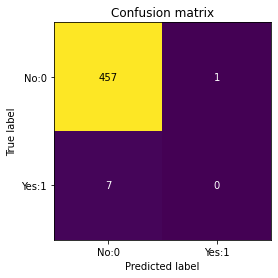

In [58]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [59]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


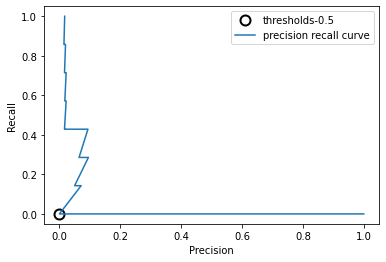

In [60]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.decision_function(x_test))

cl_z = np.argmin(np.abs(thresholds))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [61]:
i = np.argmin(np.abs(recall - 0.60))

In [62]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))

After the post processing: 
Precision:  0.02768166089965398
Recall:  0.5714285714285714


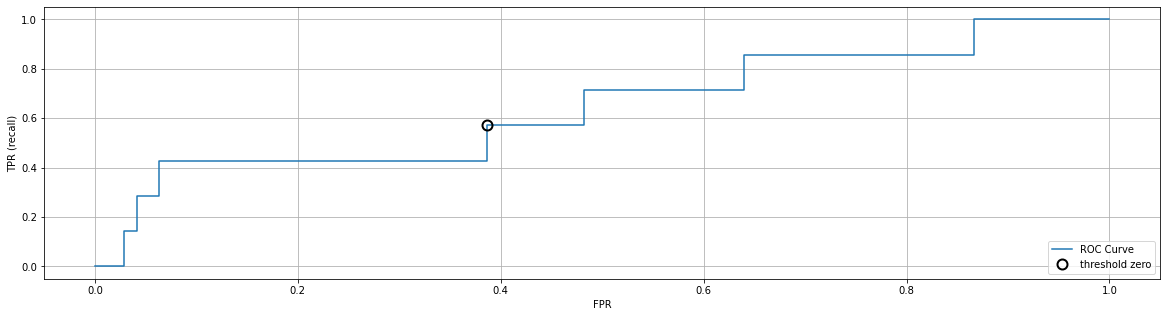

In [63]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.decision_function(x_test))

i = np.argmin(np.abs(tpr - 0.6))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [64]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train)
post_recall =  recall_score(y_test,y_predict_test)
post_f1_score =  f1_score(y_test,y_predict_test)
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))                               

After the post processing: 
Precision:  0.02997275204359673
Recall:  0.5714285714285714
F1-score:  0.0425531914893617


In [65]:
CompTable = CompTable +[['Linear SVM', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test),
              post_f1_score]]
print('Summary',CompTable)

Summary [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765], ['Log Classification', {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}, 0.8140232400211272, 0.732064878353088, 0.5714285714285714, 0.05572755417956656, 0.708203368683718, 0.0975609756097561], ['Linear SVM', {'C': 1000, 'max_iter': 16}, 0.7853882139892855, 0.641609482220836, 0.5714285714285714, 0.02997275204359673, 0.5924828446662508, 0.0425531914893617]]


### Kernel SVC rbf

In [66]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics

In [67]:
from sklearn.model_selection import GridSearchCV

paramgridsvm = {'C':[10,12],
                    'gamma':[0.0001, 0.001,0.1], 
                    'kernel':['rbf']}
gs_model = SVC()
gs_model = GridSearchCV(gs_model, paramgridsvm, cv = 5, n_jobs= -1,scoring='roc_auc')
gs_model.fit(x_train,y_train)
print("Best score- Kernelized SVM grid serach: ",gs_model.best_score_)
print("Best parameters- Kernelized SVM grid serach: ",gs_model.best_params_)

Best score- Kernelized SVM grid serach:  0.6938695511141054
Best parameters- Kernelized SVM grid serach:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


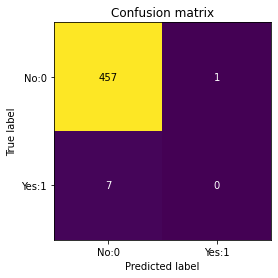

In [68]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [69]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


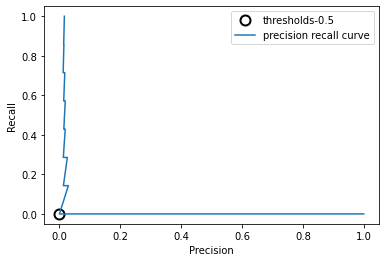

In [70]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.decision_function(x_test))

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [71]:
i = np.argmin(np.abs(recall - 0.20))

In [72]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))

After the post processing: 
Precision:  0.039711191335740074
Recall:  0.14285714285714285


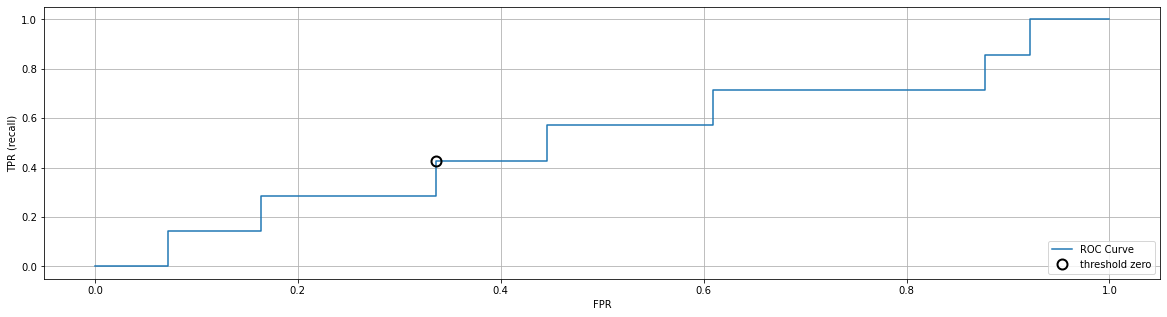

In [73]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.decision_function(x_test))

i = np.argmin(np.abs(tpr - 0.4))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [74]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train)
post_recall =  recall_score(y_test,y_predict_test)
post_f1_score =  f1_score(y_test,y_predict_test)
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))                               

After the post processing: 
Precision:  0.02867383512544803
Recall:  0.42857142857142855
F1-score:  0.036585365853658534


In [75]:
CompTable = CompTable +[['Kernel rbf SVC', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test),
              post_f1_score]]
print('Summary',CompTable)

Summary [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765], ['Log Classification', {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}, 0.8140232400211272, 0.732064878353088, 0.5714285714285714, 0.05572755417956656, 0.708203368683718, 0.0975609756097561], ['Linear SVM', {'C': 1000, 'max_iter': 16}, 0.7853882139892855, 0.641609482220836, 0.5714285714285714, 0.02997275204359673, 0.5924828446662508, 0.0425531914893617], ['Kernel rbf SVC', {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.6973515430468574, 0.5106051154086089, 0.42857142857142855, 0.02867383512544803, 0.5461634435433562, 0.036585365853658534]]


#### Kenrnel type Linear

In [76]:
from sklearn.model_selection import GridSearchCV

paramgridsvm = {'C':[0.1,1,10,12], 
                    'kernel':['linear']}
gs_model = SVC()
gs_model = GridSearchCV(gs_model, paramgridsvm, cv = 5, n_jobs= -1,scoring='roc_auc')
gs_model.fit(x_train,y_train)
print("Best score- Kernelized SVM grid serach: ",gs_model.best_score_)
print("Best parameters- Kernelized SVM grid serach: ",gs_model.best_params_)

Best score- Kernelized SVM grid serach:  0.666452828305512
Best parameters- Kernelized SVM grid serach:  {'C': 0.1, 'kernel': 'linear'}


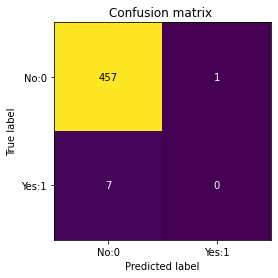

In [77]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix ")
plt.gca().invert_yaxis()

In [78]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


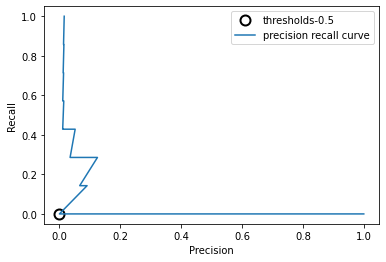

In [79]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.decision_function(x_test))

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [80]:
i = np.argmin(np.abs(recall - 0.30))

In [81]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))

After the post processing: 
Precision:  0.046511627906976744
Recall:  0.2857142857142857


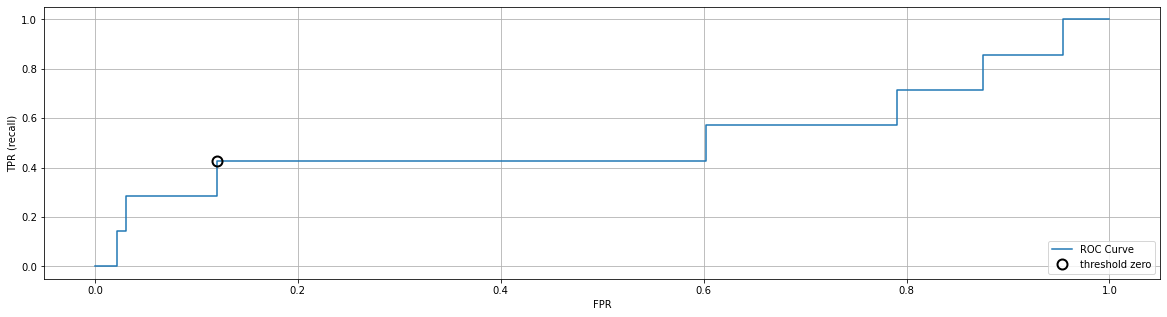

In [82]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.decision_function(x_test))

i = np.argmin(np.abs(tpr - 0.4))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [83]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train)
post_recall =  recall_score(y_test,y_predict_test)
post_f1_score =  f1_score(y_test,y_predict_test)
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))                               

After the post processing: 
Precision:  0.045112781954887216
Recall:  0.42857142857142855
F1-score:  0.0923076923076923


In [84]:
CompTable = CompTable +[['Kernel linear SVC', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test),
              post_f1_score]]
print('Summary',CompTable)

Summary [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765], ['Log Classification', {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}, 0.8140232400211272, 0.732064878353088, 0.5714285714285714, 0.05572755417956656, 0.708203368683718, 0.0975609756097561], ['Linear SVM', {'C': 1000, 'max_iter': 16}, 0.7853882139892855, 0.641609482220836, 0.5714285714285714, 0.02997275204359673, 0.5924828446662508, 0.0425531914893617], ['Kernel rbf SVC', {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.6973515430468574, 0.5106051154086089, 0.42857142857142855, 0.02867383512544803, 0.5461634435433562, 0.036585365853658534], ['Kernel linear SVC', {'C': 0.1, 'kernel': 'linear'}, 0.7087451897683543, 0.5149719276356831, 0.42857142857142855, 0.045112781954887216, 0.6542420461634436, 0.0923076923076923]]


#### Kenrnel type poly

In [85]:
from sklearn.model_selection import GridSearchCV

paramgridsvm = {'C':[10,12],
                    'gamma':[0.0001, 0.001,0.1], 
                    'kernel':['poly']}
gs_model = SVC()
gs_model = GridSearchCV(gs_model, paramgridsvm, cv = 5, n_jobs= -1,scoring='roc_auc')
gs_model.fit(x_train,y_train)
print("Best score- Kernelized SVM grid serach: ",gs_model.best_score_)
print("Best parameters- Kernelized SVM grid serach: ",gs_model.best_params_)

Best score- Kernelized SVM grid serach:  0.5775971255333483
Best parameters- Kernelized SVM grid serach:  {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}


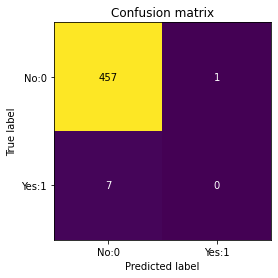

In [86]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [87]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


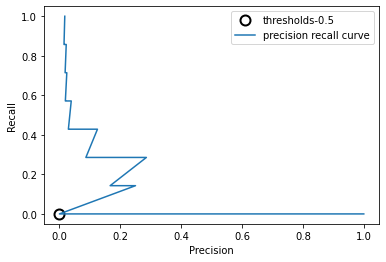

In [88]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.decision_function(x_test))

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

###  Changing the Treshold to improve scores

In [89]:
i = np.argmin(np.abs(recall - 0.30))

In [90]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_test, y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))

After the post processing: 
Precision:  0.08695652173913043
Recall:  0.2857142857142857


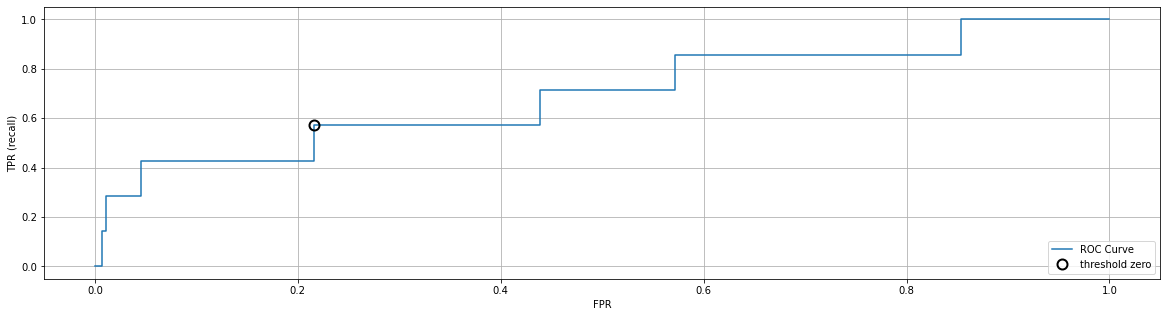

In [91]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.decision_function(x_test))

i = np.argmin(np.abs(tpr - 0.6))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [92]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.decision_function(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.decision_function(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train)
post_recall =  recall_score(y_test,y_predict_test)
post_f1_score =  f1_score(y_test,y_predict_test)
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))                               

After the post processing: 
Precision:  0.06373626373626373
Recall:  0.5714285714285714
F1-score:  0.07272727272727272


In [93]:
CompTable = CompTable +[['Kernel Poly SVC', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test),
              post_f1_score]]
print('Summary',CompTable)

Summary [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765], ['Log Classification', {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}, 0.8140232400211272, 0.732064878353088, 0.5714285714285714, 0.05572755417956656, 0.708203368683718, 0.0975609756097561], ['Linear SVM', {'C': 1000, 'max_iter': 16}, 0.7853882139892855, 0.641609482220836, 0.5714285714285714, 0.02997275204359673, 0.5924828446662508, 0.0425531914893617], ['Kernel rbf SVC', {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.6973515430468574, 0.5106051154086089, 0.42857142857142855, 0.02867383512544803, 0.5461634435433562, 0.036585365853658534], ['Kernel linear SVC', {'C': 0.1, 'kernel': 'linear'}, 0.7087451897683543, 0.5149719276356831, 0.42857142857142855, 0.045112781954887216, 0.6542420461634436, 0.0923076923076923], ['Kernel Poly SVC', {'C': 10, 'gamm

### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20],'min_samples_leaf' : range(2,50)}




In [96]:
gs_model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
gs_model.fit(x_train, y_train)
print("Best score- Decison Tree grid serach: ",gs_model.best_score_)
print("Best parameters- Decison Tree SVM grid serach: ",gs_model.best_params_)

Best score- Decison Tree grid serach:  0.7167878084686977
Best parameters- Decison Tree SVM grid serach:  {'max_depth': 4, 'min_samples_leaf': 23}


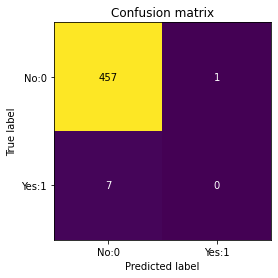

In [97]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [98]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


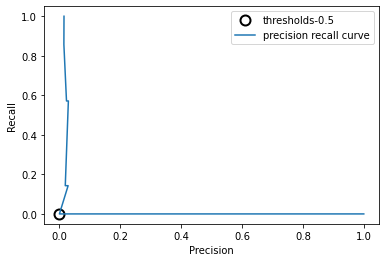

In [99]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.predict_proba(x_test)[:,1])

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [100]:
i = np.argmin(np.abs(recall - 0.60))

In [101]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_test, y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the post processing: 
Precision:  0.023255813953488372
Recall:  0.5714285714285714


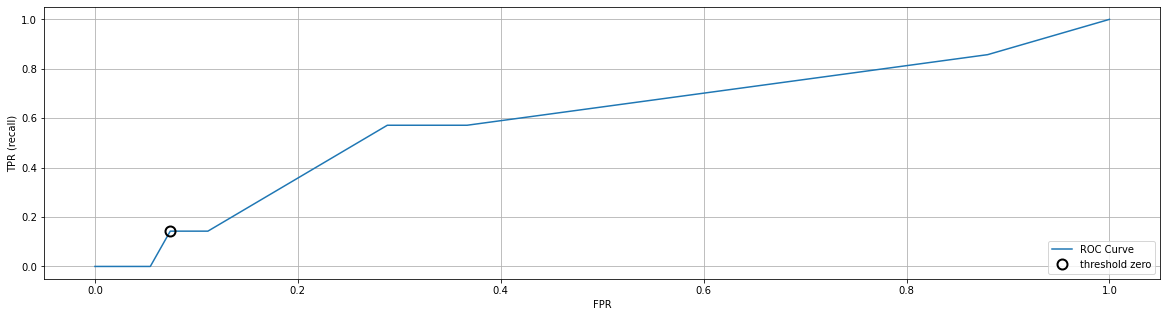

In [102]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.predict_proba(x_test)[:,1])

i = np.argmin(np.abs(tpr - 0.2))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [103]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train[:,1])
post_recall =  recall_score(y_test,y_predict_test[:,1])
post_f1_score =  f1_score(y_test,y_predict_test[:,1])
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))                               

After the post processing: 
Precision:  0.1144578313253012
Recall:  0.14285714285714285
F1-score:  0.04761904761904761


In [104]:
CompTable = CompTable +[['Decision Tree', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test[:,1]),
              post_f1_score]]
print('Summary',CompTable)

Summary [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765], ['Log Classification', {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}, 0.8140232400211272, 0.732064878353088, 0.5714285714285714, 0.05572755417956656, 0.708203368683718, 0.0975609756097561], ['Linear SVM', {'C': 1000, 'max_iter': 16}, 0.7853882139892855, 0.641609482220836, 0.5714285714285714, 0.02997275204359673, 0.5924828446662508, 0.0425531914893617], ['Kernel rbf SVC', {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.6973515430468574, 0.5106051154086089, 0.42857142857142855, 0.02867383512544803, 0.5461634435433562, 0.036585365853658534], ['Kernel linear SVC', {'C': 0.1, 'kernel': 'linear'}, 0.7087451897683543, 0.5149719276356831, 0.42857142857142855, 0.045112781954887216, 0.6542420461634436, 0.0923076923076923], ['Kernel Poly SVC', {'C': 10, 'gamm

#### Random Forest 

In [105]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [1,4,5,10],'max_features' : [0.01,0.1,0.5],'n_estimators':[100,200,500]
             ,'max_samples': [0.01,0.1]}


In [106]:
gs_model = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
gs_model.fit(x_train, y_train)
print("Best score- Decison Tree grid serach: ",gs_model.best_score_)
print("Best parameters- Decison Tree SVM grid serach: ",gs_model.best_params_)

Best score- Decison Tree grid serach:  0.7584600893280435
Best parameters- Decison Tree SVM grid serach:  {'max_depth': 10, 'max_features': 0.1, 'max_samples': 0.1, 'n_estimators': 100}


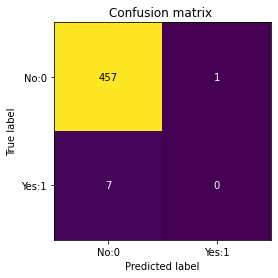

In [107]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix ")
plt.gca().invert_yaxis()

In [108]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


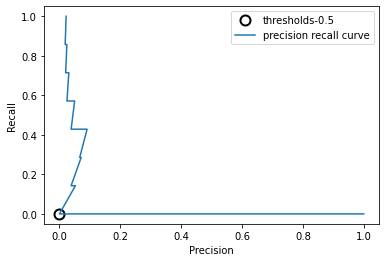

In [109]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.predict_proba(x_test)[:,1])

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [110]:
i = np.argmin(np.abs(recall - 0.35))

In [111]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_test, y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the post processing: 
Precision:  0.06666666666666667
Recall:  0.2857142857142857


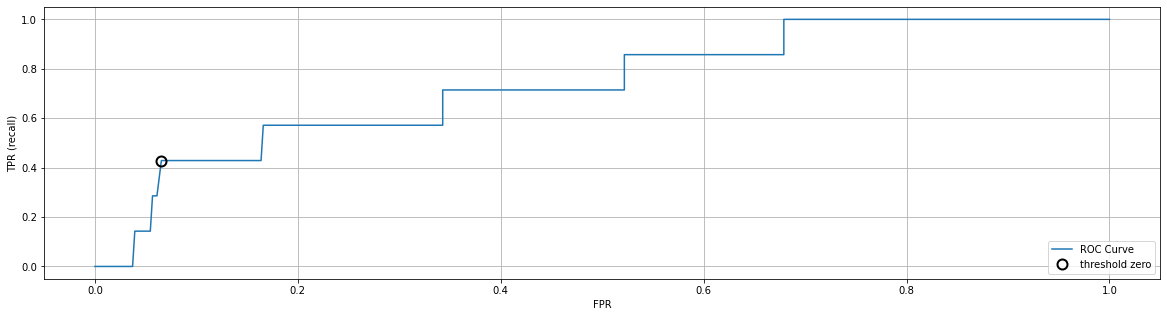

In [112]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.predict_proba(x_test)[:,1])

i = np.argmin(np.abs(tpr - 0.42))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [113]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train[:,1])
post_recall =  recall_score(y_test,y_predict_test[:,1])
post_f1_score =  f1_score(y_test,y_predict_test[:,1])
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1])) 
print('roc_auc-score: ', roc_auc_score(y_test,y_predict_test[:,1]))  

After the post processing: 
Precision:  0.2
Recall:  0.42857142857142855
F1-score:  0.15000000000000002
roc_auc-score:  0.6815346225826575


In [114]:
CompTable = CompTable +[['Random Forest', gs_model.best_params_, gs_model.score(x_train, y_train),gs_model.score(x_test, y_test),
              post_recall,post_precision,
              roc_auc_score(y_test, y_predict_test[:,1]),
              post_f1_score]]
print('Summary',CompTable)

Summary [['KNN Classification', {'metric': 'euclidean', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}, 0.9999811363464876, 0.6163443543356206, 0.42857142857142855, 0.9354838709677419, 0.6324079850280724, 0.07058823529411765], ['Log Classification', {'C': 0.11421052631578947, 'max_iter': 13, 'penalty': 'l2'}, 0.8140232400211272, 0.732064878353088, 0.5714285714285714, 0.05572755417956656, 0.708203368683718, 0.0975609756097561], ['Linear SVM', {'C': 1000, 'max_iter': 16}, 0.7853882139892855, 0.641609482220836, 0.5714285714285714, 0.02997275204359673, 0.5924828446662508, 0.0425531914893617], ['Kernel rbf SVC', {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.6973515430468574, 0.5106051154086089, 0.42857142857142855, 0.02867383512544803, 0.5461634435433562, 0.036585365853658534], ['Kernel linear SVC', {'C': 0.1, 'kernel': 'linear'}, 0.7087451897683543, 0.5149719276356831, 0.42857142857142855, 0.045112781954887216, 0.6542420461634436, 0.0923076923076923], ['Kernel Poly SVC', {'C': 10, 'gamm

In [115]:
CompTable1 = pd.DataFrame(CompTable,columns = ['Model name','Model parameter', 'Train accuracy ', 'Test accuracy ','recall score','precision_score',
                                              'auc_roc','F1_Score'])
CompTable1.index = CompTable1['Model name']
CompTable1.round(2)
CompTable1

,Model name,Model parameter,Train accuracy,Test accuracy,recall score,precision_score,auc_roc,F1_Score
Model name,,,,,,,,
KNN Classification,KNN Classification,"{'metric': 'euclidean', 'n_neighbors': 14, 'p'...",0.999981,0.616344,0.428571,0.935484,0.632408,0.070588
Log Classification,Log Classification,"{'C': 0.11421052631578947, 'max_iter': 13, 'pe...",0.814023,0.732065,0.571429,0.055728,0.708203,0.097561
Linear SVM,Linear SVM,"{'C': 1000, 'max_iter': 16}",0.785388,0.641609,0.571429,0.029973,0.592483,0.042553
Kernel rbf SVC,Kernel rbf SVC,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.697352,0.510605,0.428571,0.028674,0.546163,0.036585
Kernel linear SVC,Kernel linear SVC,"{'C': 0.1, 'kernel': 'linear'}",0.708745,0.514972,0.428571,0.045113,0.654242,0.092308
Kernel Poly SVC,Kernel Poly SVC,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}",0.958764,0.693699,0.571429,0.063736,0.677636,0.072727
Decision Tree,Decision Tree,"{'max_depth': 4, 'min_samples_leaf': 23}",0.892006,0.592795,0.142857,0.114458,0.534311,0.047619
Random Forest,Random Forest,"{'max_depth': 10, 'max_features': 0.1, 'max_sa...",0.986720,0.733468,0.428571,0.200000,0.681535,0.150000


# Best model ( 5 points)
Explain which machine learning model is the best model for this dataset and why? 

### As seen from the above table Linear SVC has the highest roc_auc curve and F-1 score and the precision score being the second highest. Hence we will select Linear SVC as the best Model. We will Adaboost this model to make our final prediction

### Fitting the best Model on the entire dataset and applying Adaboost

In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [117]:


gs_model = AdaBoostClassifier(LinearSVC(C=10,max_iter=95), n_estimators=100, 
                             algorithm="SAMME", learning_rate=0.1, random_state=0)

gs_model.fit(x_train, y_train)
print('Train Score:',gs_model.score(x_train,y_train))
print('Trest Score:',gs_model.score(x_test,y_test))

Train Score: 0.9843834141087776
Trest Score: 0.9827956989247312


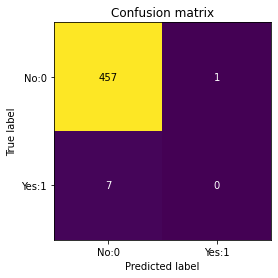

In [118]:
import mglearn
%matplotlib inline

y_pred = gs_model.predict(x_test)
scoresimage_ = mglearn.tools.heatmap(
    confusion_matrix(y_test,y_pred_knncs), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No:0','Yes:1'],
    yticklabels=['No:0','Yes:1'], fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [119]:
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import roc_auc_score

Knn_recall_Score = recall_score(y_test, gs_model.predict(x_test))
print('Log Recall score : {:.4f} '.format(recall_score(y_test, gs_model.predict(x_test))))

Knn_Precision_Score = precision_score(y_test, gs_model.predict(x_test))
print('Log Precision score : {:.4f} '.format(precision_score(y_test, gs_model.predict(x_test))))

Knn_f1_Score = f1_score(y_test, gs_model.predict(x_test))
print('Log F1 score : {:.4f} '.format(f1_score(y_test, gs_model.predict(x_test))))

Log Recall score : 0.0000 
Log Precision score : 0.0000 
Log F1 score : 0.0000 


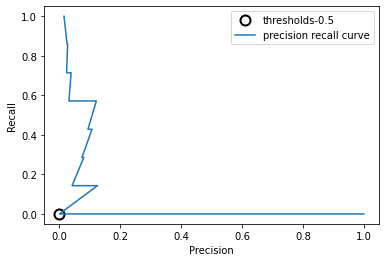

In [120]:
import mglearn
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, gs_model.predict_proba(x_test)[:,1])

cl_z = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[cl_z], recall[cl_z], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [121]:
i = np.argmin(np.abs(recall - 0.6))

In [122]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')                              
print('Precision: ', precision_score(y_test, y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the post processing: 
Precision:  0.03125
Recall:  0.5714285714285714


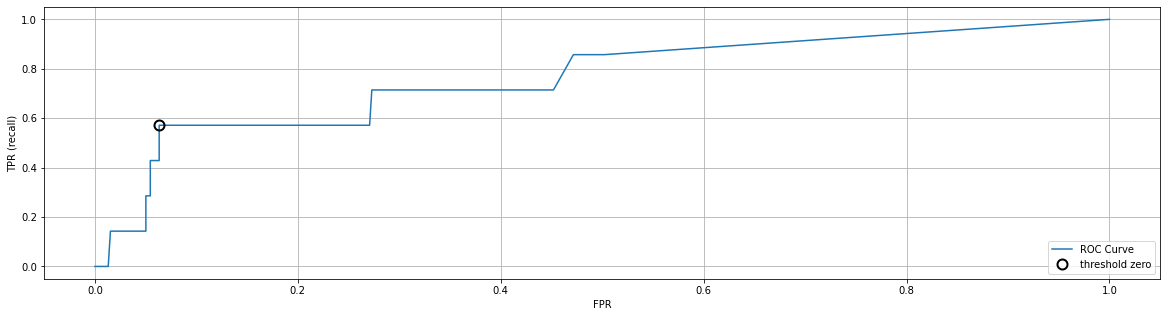

In [123]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gs_model.predict_proba(x_test)[:,1])

i = np.argmin(np.abs(tpr - 0.6))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [124]:
from sklearn.metrics import precision_score, recall_score

y_predict_test = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(gs_model.predict_proba(x_train) >= thresholds[i], 1, 0)
print('After the post processing: ')
post_precision = precision_score(y_train, y_predict_train[:,1])
post_recall =  recall_score(y_test,y_predict_test[:,1])
post_f1_score =  f1_score(y_test,y_predict_test[:,1])
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1])) 
print('roc_auc-score: ', roc_auc_score(y_test,y_predict_test[:,1]))  

After the post processing: 
Precision:  0.06766917293233082
Recall:  0.5714285714285714
F1-score:  0.2
roc_auc-score:  0.7540548970679974


In [125]:
# Confusion Matrix

In [126]:
from sklearn.metrics import accuracy_score,classification_report

In [127]:
predicted = np.where(gs_model.predict_proba(x_test) >= thresholds[i], 1, 0)
print('Accuracy of the Model: ', accuracy_score(y_test, predicted[:,1]), '\n')
print('Confusion Matrix of the Model:\n', confusion_matrix(y_test, predicted[:,1]), '\n')
print('Classification Report of the Model:\n', classification_report(y_test, predicted[:,1]))

Accuracy of the Model:  0.9311827956989247 

Confusion Matrix of the Model:
 [[429  29]
 [  3   4]] 

Classification Report of the Model:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       458
           1       0.12      0.57      0.20         7

    accuracy                           0.93       465
   macro avg       0.56      0.75      0.58       465
weighted avg       0.98      0.93      0.95       465



# Grading (50 points)
Your model should predict the outcome for every row in the test.csv. 
You should be able to correctly print the ``final_test_prediction`` executing the following statement: 

### Fitting the best model on the entire training dataset

In [128]:

x = df_train.drop(['Crash Severity'],axis=1)
y = df_train['Crash Severity']


In [129]:

scaler = MinMaxScaler()

X_scale=scaler.fit_transform(x)

X_scale.shape


gs_model = AdaBoostClassifier(LinearSVC(C=10,max_iter=95), n_estimators=100, 
                             algorithm="SAMME", learning_rate=0.1, random_state=0)



gs_model.fit(X_scale, y)
print('Train Score:',gs_model.score(X_scale,y))

Train Score: 0.9844961240310077


In [130]:
thresholds[i]

0.3645384857481699

#### Now finally we will make our final prediction on the x_test.csv 

In [131]:
Final_scale=scaler.transform(df_test)

In [132]:
final_test_prediction = np.where(gs_model.predict_proba(Final_scale) >= 0.3645384857481699, 1, 0)

In [133]:
print('Shape of the predicted:',final_test_prediction.shape)

Shape of the predicted: (774, 2)


In [134]:
final_test_prediction[:,1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [137]:
c = np.bincount(final_test_prediction[:,1])

In [138]:
c[1]

67

In [139]:
c[0]

707